## Task1 - Prediction using Supervised ML
- Predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.
- Que. What will be the predicted score if the student studies for 9.25 hr/day ? 

### Author: SOUBHAGYA RANJAN BAL

In [44]:
# Importing all libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
warnings.filterwarnings("ignore")


### Importing Dataset

In [45]:
# Reading data 
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [46]:
data.shape

(25, 2)

In [47]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- The dataset has the no of Hours and Scores/ Marks obtained by the students (count :25)

### Scatter Plot

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

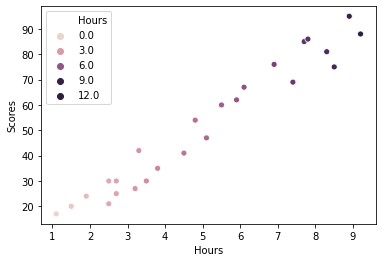

In [55]:

sb.scatterplot(data=data, x="Hours", y="Scores", hue="Hours")

### Pair Plot

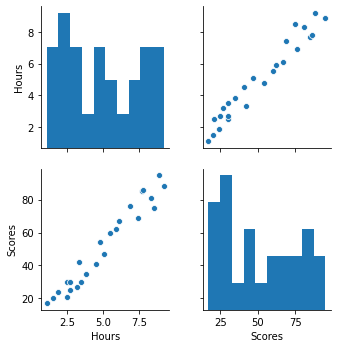

In [56]:
sb.pairplot(data)

### Checking for Outliers

<AxesSubplot:xlabel='Hours'>

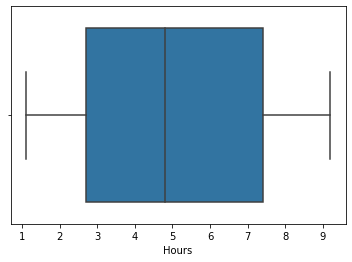

In [65]:
sb.boxplot(data["Hours"])


<AxesSubplot:xlabel='Scores'>

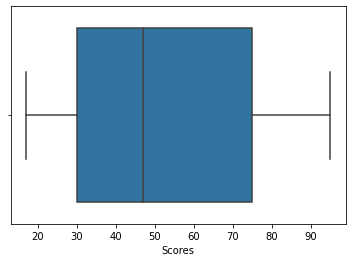

In [66]:
sb.boxplot(data["Scores"])


<AxesSubplot:title={'center':'Scores'}, xlabel='Hours'>

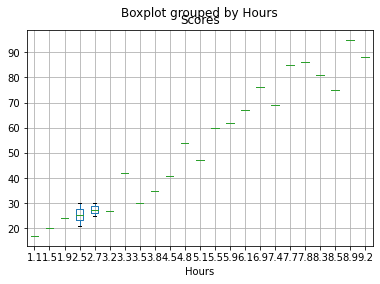

In [67]:
data.boxplot(column='Scores', by='Hours')

### Finding Correlation between the data

- **Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script**:

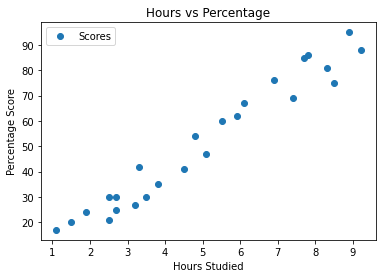

In [71]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

In [74]:
#Checking for  the correlation in the data
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- So there is strong positive correlation between no of Hours and Scores obtained

### SPLITTING THE DATASET

In [79]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### SPLITTING THE DATASET TO TRAIN AND TEST

In [80]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

### TRAINING THE MODEL

In [87]:
ln_reg = LinearRegression()  
ln_reg.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### PREDICTION

In [104]:
#Prediction using the test data
y_pred=ln_reg.predict(x_test)

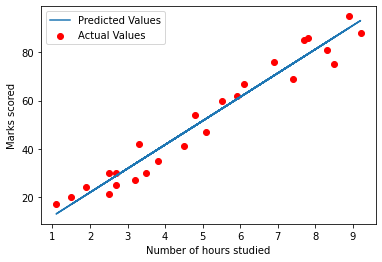

In [105]:
# Plotting the regression line
line = ln_reg.coef_*x+ln_reg.intercept_

# Plotting for the test data


plt.scatter(x,y,color='red',label='Actual Values')
plt.plot(x,line,label='Predicted Values')
plt.xlabel('Number of hours studied')
plt.ylabel('Marks scored')
plt.legend()

### RESIDUAL CALCULATION

In [106]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df['residual']=df['Actual']-df['Predicted']
df

,Actual,Predicted,residual
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


### Model Evaluation

In [107]:
#Model Evaluation
from sklearn.metrics import r2_score,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)
print('RMSE=',rmse)
print('R2 Score=',r2)

RMSE= 4.647447612100367
R2 Score= 0.9454906892105355


### Predicting the score of student if he studies 9.25 hr/day ?

In [113]:
hours=np.array([9.25]).reshape(-1,1)
own_predict=ln_reg.predict(hours)
print("Predicted % Score of Student is  = {} %".format(own_predict[0]))

Predicted % Score of Student is  = 93.69173248737535 %
